<a href="https://colab.research.google.com/github/nyla111/machine-learning-31005/blob/main/ML_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load, split, scale

I used the Breast Cancer Wisconsin dataset, built into scikit-learn. Each row represents one patient’s tumor with 30 numeric features (like radius, smoothness, symmetry). The target is binary:

*   0 = malignant (cancerous)
*   1 = benign (not cancerous)

Before training Logistic Regression, I scaled the features with **StandardScaler** so all values have mean 0 and variance 1. This prevents features with larger numeric ranges from dominating.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target  # 0=malignant, 1=benign

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# 2. Logistic Regression model (replaces dummy one)

## 2.1 Hypothesis

We assume probability of class 1 (benign) is modeled by a sigmoid function of a linear combination:

$\hat{p}(y=1|x) = \sigma(w^T x + b), \quad \sigma(z) = \frac{1}{1+e^{-z}}$

This means the model takes input features, multiplies them by weights, adds a bias term, and then applies the sigmoid function to squash the output into a probability between 0 and 1.

## 2.2 Loss Function

To measure how well the model fits the data, we use the logistic (cross-entropy) loss:

$L = -\frac{1}{N}\sum_i \big[y_i \log(\hat{p}_i) + (1-y_i)\log(1-\hat{p}_i)\big]$

This loss penalizes the model more strongly when it makes confident but wrong predictions. If the model predicts 0.9 for a positive case, the loss is small; if it predicts 0.1 for a positive case, the loss is very large.


## 2.3 Optimizer
We train the model using gradient descent. The gradients of the loss with respect to the weights and bias show us how to adjust the parameters to reduce error. The update rules are:

$w := w - \eta \frac{\partial L}{\partial w}, \quad b := b - \eta \frac{\partial L}{\partial b}$

where $ \eta $ is the learning rate. Over many iterations, the model gradually improves by minimizing the loss.

In [15]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        eps = 1e-9
        return -np.mean(y*np.log(y_pred+eps) + (1-y)*np.log(1-y_pred+eps))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.w) + self.b   # w^T x + b
            y_pred = self.sigmoid(linear_model)

            # Record loss
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            # Gradient calculation
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(linear_model)
        return np.column_stack([1-y_pred, y_pred])  # [P(class 0), P(class 1)]

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs[:, 1] >= 0.5).astype(int)


# 3. Test Function

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Load and scale data
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train scratch model
model = LogisticRegression(lr=0.1, n_iter=1000)
model.fit(X_train, y_train)

# Predictions
probs = model.predict_proba(X_test)
preds = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, preds))
print("Log Loss:", log_loss(y_test, probs))

Accuracy: 0.9649122807017544
Log Loss: 0.08468648156873768


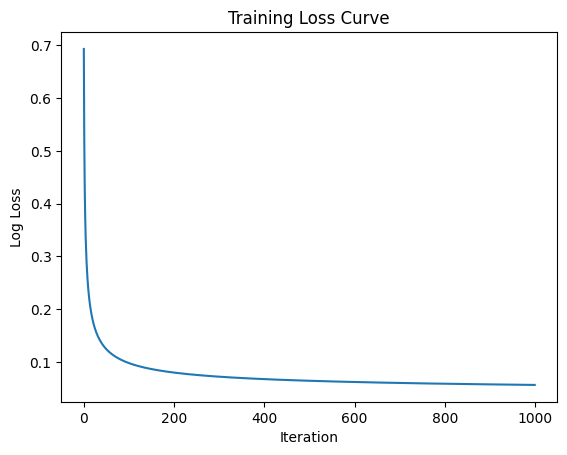

In [17]:
import matplotlib.pyplot as plt

plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Training Loss Curve")
plt.show()